In [293]:
import pandas as pd
import numpy as np

In [245]:
def style_columns(dataframe, key_cols, left_cols, right_cols, calc_cols):
    
    styles = pd.DataFrame("", index=dataframe.index, columns=dataframe.columns)
    
    for col in dataframe.columns:
        
        if col in key_cols:
            styles[col] = "background-color: lightgreen"
            
        elif col in left_cols:
            styles[col] = "background-color: lightyellow"
            
        elif col in right_cols:
            styles[col] = "background-color: lightblue"

        elif col in calc_cols:
            styles[col] = "background-color: pink"            
            
    return styles

In [246]:
cols = {
    'key_cols':['grade', 'grade_x', 'grade_y', 'item', 'item_x', 'item_y'],
    'left_cols':['name', 'n_sold'], 
    'right_cols':['letter', 'price'],
    'calc_cols': ['revenue']
}

https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge
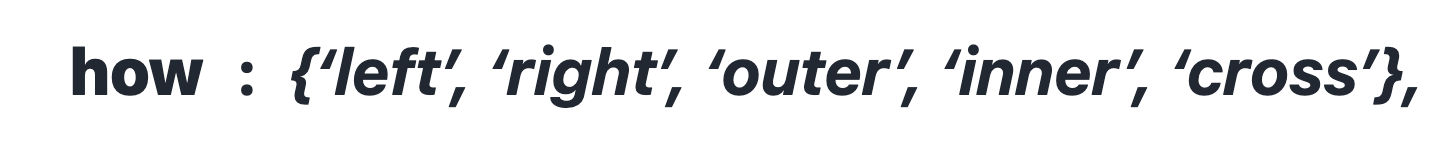

---

---

# Student-Grade

In [278]:
student_grades = pd.DataFrame({
    "name": ["Ada", "Bob", "Cam", "Dan"],
    "grade": [90, 80, 70, -1],
})

student_grades.style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade
0,Ada,90
1,Bob,80
2,Cam,70
3,Dan,-1


# Grade-Letter

In [280]:
grade_letter = pd.DataFrame({
    'grade': [90, 80, 70, 60, 50],
    'letter': ['A', 'B', 'C', 'D', 'F']
})
grade_letter                            .style.apply(func=style_columns, axis=None, subset=None, **cols)

,grade,letter
0,90,A
1,80,B
2,70,C
3,60,D
4,50,F


# left

##### validate
* “one_to_one” or “1:1”: check if merge keys are unique in both left and right datasets
* “one_to_many” or “1:m”: check if merge keys are unique in left dataset.
* “many_to_one” or “m:1”: check if merge keys are unique in right dataset.
* “many_to_many” or “m:m”: allowed, but does not result in checks.

In [281]:
# left
student_grades.merge(
    right=grade_letter, 
    on='grade', 
    how='left',
    validate="1:m")                                                     .style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade,letter
0,Ada,90,A
1,Bob,80,B
2,Cam,70,C
3,Dan,-1,nan


# right

In [287]:
# right
student_grades.merge(
    right=grade_letter, 
    on='grade', 
    how='right',
    validate="1:m")                                                             .style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade,letter
0,Ada,90,A
1,Bob,80,B
2,Cam,70,C
3,nan,60,D
4,nan,50,F


# outer

In [288]:
# outer
student_grades.merge(
    right=grade_letter, 
    on='grade', 
    how='outer',
    validate="1:m")                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade,letter
0,Dan,-1,nan
1,nan,50,F
2,nan,60,D
3,Cam,70,C
4,Bob,80,B
5,Ada,90,A


# inner (default)

In [289]:
# inner
student_grades.merge(
    right=grade_letter, 
    on='grade', 
    how='inner',
    validate="1:m")                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,name,grade,letter
0,Ada,90,A
1,Bob,80,B
2,Cam,70,C


# cross

In [290]:
# cross
student_grades.merge(
    right=grade_letter, 
    # on='grade', 
    how='cross',
    validate="1:m")                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

MergeError: Merge keys are not unique in left dataset; not a one-to-many merge

---

---

# Sales

In [254]:
sales = pd.DataFrame({
    'n_sold': [3,4,1],
    'item': ['pen', 'pencil', 'eraser'],
})
sales                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols)

,n_sold,item
0,3,pen
1,4,pencil
2,1,eraser


# Prices

In [255]:
prices = pd.DataFrame({
    'item': ['pen', 'pencil', 'eraser', 'ruler'],
    'price': [3.0, 1.0, 0.5, 2.0]
})
prices                                                                        .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2) 

,item,price
0,pen,3.00
1,pencil,1.00
2,eraser,0.50
3,ruler,2.00


# Item Revenue Analysis

## left

In [265]:
# left
rev = sales.merge(
    right=prices, 
    on='item', 
    how='left')                                    

rev['revenue'] = rev['n_sold'] * rev['price']
rev                                                                                       .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2)  

,n_sold,item,price,revenue
0,3,pen,3.00,9.00
1,4,pencil,1.00,4.00
2,1,eraser,0.50,0.50


## right

In [266]:
# right
rev = sales.merge(
    right=prices, 
    on='item', 
    how='right').fillna(0)

rev['revenue'] = rev['n_sold'] * rev['price']
rev                                                                                       .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2) 

,n_sold,item,price,revenue
0,3.00,pen,3.00,9.00
1,4.00,pencil,1.00,4.00
2,1.00,eraser,0.50,0.50
3,0.00,ruler,2.00,0.00


## outer

In [267]:
# outer
rev = sales.merge(
    right=prices, 
    on='item', 
    how='outer').fillna(0)

rev['revenue'] = rev['n_sold'] * rev['price']
rev                                                                                       .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2) 

,n_sold,item,price,revenue
0,1.00,eraser,0.50,0.50
1,3.00,pen,3.00,9.00
2,4.00,pencil,1.00,4.00
3,0.00,ruler,2.00,0.00


## inner

In [268]:
# inner
rev = sales.merge(
    right=prices, 
    on='item', 
    how='inner').fillna(0)

rev['revenue'] = rev['n_sold'] * rev['price']
rev                                                                                       .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2) 

,n_sold,item,price,revenue
0,3,pen,3.00,9.00
1,4,pencil,1.00,4.00
2,1,eraser,0.50,0.50


## cross

In [269]:
# cross
rev = sales.merge(
    right=prices, 
    how='cross').fillna(0)

rev['revenue'] = rev['n_sold'] * rev['price']
rev                                                                                       .style.apply(func=style_columns, axis=None, subset=None, **cols).format(precision=2) 

,n_sold,item_x,item_y,price,revenue
0,3,pen,pen,3.00,9.00
1,3,pen,pencil,1.00,3.00
2,3,pen,eraser,0.50,1.50
3,3,pen,ruler,2.00,6.00
4,4,pencil,pen,3.00,12.00
5,4,pencil,pencil,1.00,4.00
6,4,pencil,eraser,0.50,2.00
7,4,pencil,ruler,2.00,8.00
8,1,eraser,pen,3.00,3.00
9,1,eraser,pencil,1.00,1.00


In [313]:
np.random.rand?

Signature: np.random.rand(*args)
Docstring:
rand(d0, d1, ..., dn)

Random values in a given shape.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `random_sample`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is returned.

Returns
-------
out : ndarray, shape ``(d0, d1, ..., dn)``
    Random values.

See Also
--------
random

Examples
--------
>>> np.random.rand(3,2)
array([[ 0.14022471,  0.96360618],  #random
       [ 0.37601032,  0.25528411],  #random
       [ 0.49313049,  0.94909878]]) #random
Type:      method

# floats

In [315]:
%%time
N, M = 10000, 5
df = pd.DataFrame(np.random.rand(N, M))
df.merge(df, how='cross')

CPU times: user 2.32 s, sys: 3.34 s, total: 5.66 s
Wall time: 7.41 s


,0_x,1_x,2_x,3_x,4_x,0_y,1_y,2_y,3_y,4_y
0,0.086762,0.323319,0.294620,0.595824,0.225171,0.086762,0.323319,0.294620,0.595824,0.225171
1,0.086762,0.323319,0.294620,0.595824,0.225171,0.584442,0.313399,0.941945,0.573775,0.317742
2,0.086762,0.323319,0.294620,0.595824,0.225171,0.339756,0.378790,0.509008,0.614856,0.191056
3,0.086762,0.323319,0.294620,0.595824,0.225171,0.917815,0.768764,0.347728,0.146755,0.101463
4,0.086762,0.323319,0.294620,0.595824,0.225171,0.072754,0.394830,0.768487,0.725356,0.107035
...,...,...,...,...,...,...,...,...,...,...
99999995,0.140858,0.654001,0.033262,0.184555,0.721081,0.065001,0.825257,0.078400,0.030177,0.233004
99999996,0.140858,0.654001,0.033262,0.184555,0.721081,0.833150,0.518460,0.349479,0.531043,0.107984
99999997,0.140858,0.654001,0.033262,0.184555,0.721081,0.959616,0.171522,0.275502,0.017363,0.728374
99999998,0.140858,0.654001,0.033262,0.184555,0.721081,0.661345,0.425980,0.537636,0.956208,0.710152


# ints

In [323]:
N, M = 10, 5  # Example dimensions (10 rows, 5 columns)
low, high = 0, 1000  # Range for random integers [low, high)

df = pd.DataFrame(np.random.randint(low, high, size=(N, M)))
df.merge(df, how='cross')

,0_x,1_x,2_x,3_x,4_x,0_y,1_y,2_y,3_y,4_y
0,387,67,870,574,36,387,67,870,574,36
1,387,67,870,574,36,803,901,314,398,988
2,387,67,870,574,36,8,986,575,685,87
3,387,67,870,574,36,613,813,779,45,332
4,387,67,870,574,36,190,614,742,764,297
...,...,...,...,...,...,...,...,...,...,...
95,881,662,42,944,703,871,595,845,78,236
96,881,662,42,944,703,349,508,635,553,402
97,881,662,42,944,703,226,995,343,748,207
98,881,662,42,944,703,604,332,197,736,874
